In [1]:
import pysam
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dtale


FC29_bamfile = "data/consensus/bam/FC29.against_DFam_consensus.bam"
FC30_bamfile = "data/consensus/bam/FC30.against_DFam_consensus.bam"
consensus_fasta_file = "data/consensus/families.flanked_LTR.hierarchy.fa"


In [2]:
consensus_ratio_df = pd.read_csv("consensus_TE_ratio.csv", index_col="TE")
consensus_counting_df = pd.read_csv("consensus_counting.csv", index_col="ID")

## Barplot of TE expression ratio (from consensus data)

In [3]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=consensus_ratio_df.index,
    y=consensus_ratio_df["Female"],
    name='Female',
    marker_color='indianred'
))

fig.add_trace(go.Bar(
    x=consensus_ratio_df.index,
    y=consensus_ratio_df["Male"],
    name='Male',
    marker_color='blue'
))

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=1, uniformtext_mode='hide')
fig.update_layout(barmode='group', xaxis_tickangle=-45, width=1500)
fig.show()

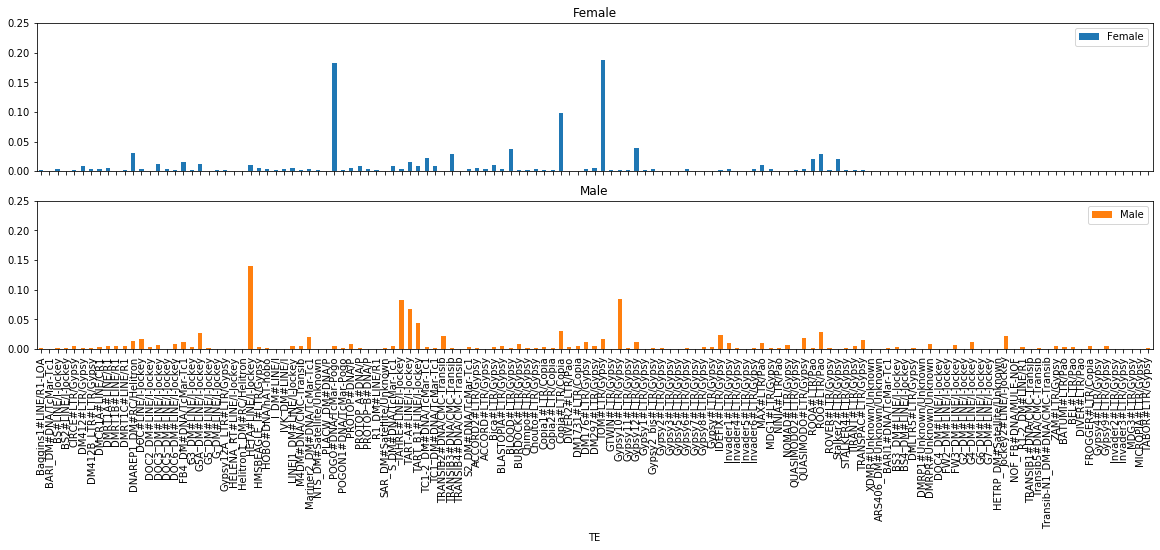

In [4]:
axs = consensus_ratio_df.plot.bar(figsize=(20,6), subplots=True, ylim=(0, 0.25))

## Pie plots : Ratio of each superfamily / family / TE

In [5]:
df = consensus_counting_df.copy()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(
    go.Pie(labels=df["SuperFamily"], values=df["Female"], textinfo='label+percent', name = "Female"),
    1, 1)

fig.add_trace(
    go.Pie(labels=df["SuperFamily"], values=df["Male"], textinfo='label+percent', name = "Male"),
    1, 2)
fig.update_traces(hole=.4, hoverinfo="label+value")

fig.update_layout(
    title_text="Ratio of expressed TE per superfamily ",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Female', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Male', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [6]:
df = consensus_counting_df.copy()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(
    go.Pie(labels=df["Family"], values=df["Female"], textinfo='label', name = "Female"),
    1, 1)

fig.add_trace(
    go.Pie(labels=df["Family"], values=df["Male"], textinfo='label', name = "Male"),
    1, 2)
fig.update_traces(hole=.4, hoverinfo="label+value+percent")

fig.update_layout(
    title_text="Ratio of expressed TE per family ",
    annotations=[dict(text='Female', x=0.15, y=0.5, font_size=20, showarrow=False),
                 dict(text='Male', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [7]:
dtale.show(df)

2021-04-14 17:02:58,421 - INFO     - NumExpr defaulting to 4 threads.


In [8]:
df = consensus_counting_df.copy()
expressed = df["Male"] > 0
df = df[expressed]
fig = px.sunburst(df, path=['SuperFamily', 'Family', 'TE'], values='Male', color = "Male_subject_coverage")
fig.show()


In [9]:
df = consensus_counting_df.copy()
expressed = df["Female"] > 0
df = df[expressed]
fig = px.sunburst(df, path=['SuperFamily', 'Family', 'TE'], values='Female', color = "Female_subject_coverage")
fig.show()